In [96]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
from collections import defaultdict
import demes, demesdraw, matplotlib.pylab as plt
import msprime as ms

import model, slice, get_LD, plot_LD

##### Functions

In [97]:
def plot_iicr(iirc,T): 
    plt.plot(T, iirc)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("time ago (years)",fontsize = 14)
    plt.ylabel(r"IICR",fontsize = 14);

In [98]:
def plot_comparison(LDpop1,LDpop2,labels=["Original","Size Change"]):
    rhos = np.logspace(-2, 2, 21)
    
    # plot D2
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.plot(rhos,LDpop1[:,0],label=labels[0])
    ax.plot(rhos,LDpop2[:,0],label=labels[1])
    ax.legend()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$\sigma_d^2$")
    ax.set_xlabel(r"$\rho$")

    # plot DZ
    ax2.plot(rhos,LDpop1[:,1],label=labels[0])
    ax2.plot(rhos,LDpop2[:,1],label=labels[1])
    ax2.legend()
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_ylabel(r"$\sigma_{Dz}$")
    ax2.set_xlabel(r"$\rho$")

    plt.tight_layout()
    plt.show()

In [ ]:
def size_change(Ns,time_period,yaml_filename=None,plot=True,plot_filename=None,time_units="years",generation_time=29):
    
    if time_units == "generations":
        generation_time=1

    m = demes.Builder(time_units=time_units,generation_time=generation_time)
    current_time=np.array(time_period).sum()

    epochs = []
    for N,time in zip(Ns,time_period):
        epoch = dict(start_size=N,end_time=current_time-time)
        current_time=current_time-time
        epochs.append(epoch)

    m.add_deme("Deme",epochs=epochs)

    # Resolve model
    graph = m.resolve()

    # Check demographic events
    print(epochs)
    
    # option to save to yaml
    if yaml_filename != None:
        demes.dump(graph, yaml_filename, format='yaml', simplified=True)
    
    if plot:
        p = demesdraw.tubes(graph, log_time=True, num_lines_per_migration=3)
        if plot_filename != None:
            p.figure.savefig(plot_filename+".pdf")
    
    return graph 

##### Arguments for models

In [99]:
N = 20e3
time_period = 0.1*N

##### 1. Constant population

In [ ]:
constant = demes.Builder()
constant.add_deme("Deme",epochs=[dict(start_size=N)])
graph = constant.resolve()
demesdraw.tubes(graph, log_time=False, num_lines_per_migration=3)

In [ ]:
T,times_dic = slice.sample_timepoints(graph)

In [ ]:
# Compute LD 
c_sliced = slice.slice_timepoints(graph,time_points=[0])
c_sliced_LD = get_LD.get_LD_from_sliced_demes(c_sliced)

In [ ]:
c_R, c_iicr, _ = model.get_iicr(graph,pop="Deme",T=T)
c_sc = model.size_change_from_iicr(c_iicr,T,time_units="generations",plot=False)

In [ ]:
plot_iicr(c_iicr,T)

In [ ]:
# Actually slice
c_sc_sliced = slice.slice_timepoints(c_sc,time_points=[0])
c_sc_sliced_LD = get_LD.get_LD_from_sliced_demes(c_sc_sliced)

In [ ]:
plot_comparison(c_sliced_LD['Deme'][-1],c_sc_sliced_LD['Deme'][-1])

##### 2. Size change - No structure

In [ ]:
sc_model = size_change(Ns=[N,N/10,N/2],time_period=[time_period,time_period*1.5,time_period/2],time_units="generations")

In [ ]:
# Sample times at epochs
T,times_dic = slice.sample_timepoints(sc_model)
# Compute LD 
sc_sliced = slice.slice_timepoints(sc_model,time_points=[0])
sc_sliced_LD = get_LD.get_LD_from_sliced_demes(sc_sliced)

In [ ]:
# Get IIRC
sc_R, sc_iicr, _ = model.get_iicr(sc_model,pop="Deme",T=T)
sc_sc = model.size_change_from_iicr(sc_iicr,T,time_units="generations",plot=True)

In [ ]:
plot_iicr(sc_iicr,T)

In [ ]:
# Slice the generated model and get LD
sc_sc_sliced = slice.slice_timepoints(sc_sc,time_points=[0])
sc_sc_sliced_LD = get_LD.get_LD_from_sliced_demes(sc_sc_sliced)

In [ ]:
plot_comparison(sc_sliced_LD['Deme'][-1],sc_sc_sliced_LD['Deme'][-1])

##### 3. Bubble, no migration

[Split(parent='Ancestral', children=['Split_00', 'Split_01'], time=5000.0)]


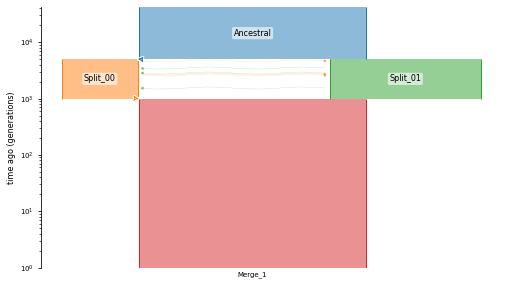

In [170]:
bubble = model.cake_model(Ns=[N,N],splits=[2],proportions=[[1/3,2/3]],time_period_merge=[N,time_period/2],time_period_splits=[time_period*2],migration_rate=0.001,generation_time=1)

In [171]:
bubble.discrete_demographic_events

<bound method Graph.discrete_demographic_events of Graph(description='', time_units='generations', generation_time=1, doi=[], metadata={}, demes=[Deme(name='Ancestral', description='', start_time=inf, ancestors=[], proportions=[], epochs=[Epoch(start_time=inf, end_time=5000.0, start_size=20000.0, end_size=20000.0, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='Split_00', description='', start_time=5000.0, ancestors=['Ancestral'], proportions=[1.0], epochs=[Epoch(start_time=5000.0, end_time=1000.0, start_size=6666.666666666666, end_size=6666.666666666666, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='Split_01', description='', start_time=5000.0, ancestors=['Ancestral'], proportions=[1.0], epochs=[Epoch(start_time=5000.0, end_time=1000.0, start_size=13333.333333333332, end_size=13333.333333333332, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='Merge_1', description='', start_time=1000.0, ancestors=['Split_00', 'S

In [172]:
# Sample times at epochs
T,times_dic = slice.sample_timepoints(bubble)
# Compute LD 
b_sliced = slice.slice_timepoints(bubble,time_points=[0])
b_sliced_LD = get_LD.get_LD_from_sliced_demes(b_sliced)

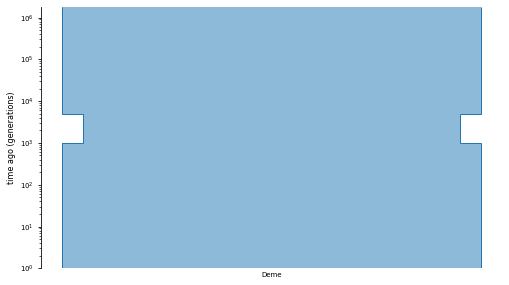

In [173]:
# Get IIRC
b_R, b_iicr, _ = model.get_iicr(bubble,pop="Merge_1",T=T)
b_sc = model.size_change_from_iicr(b_iicr,T,time_units="generations",plot=True)

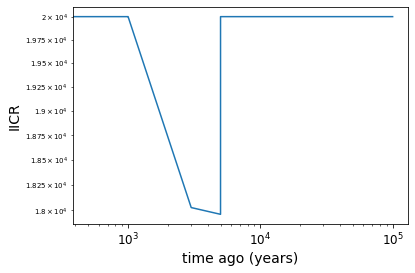

In [174]:
plot_iicr(b_iicr,T)

In [175]:
# Slice the generated model and get LD
b_sc_sliced = slice.slice_timepoints(b_sc,time_points=[0])
b_sc_sliced_LD = get_LD.get_LD_from_sliced_demes(b_sc_sliced)

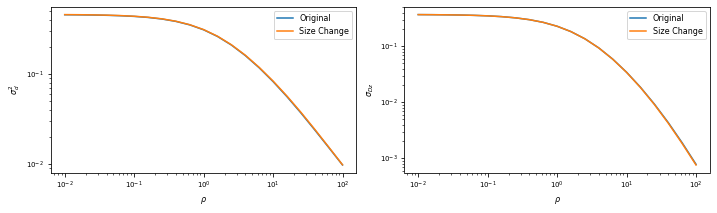

In [176]:
plot_comparison(b_sliced_LD['Merge_1'][-1],b_sc_sliced_LD['Deme'][-1])

##### 4. Isolation with Migration model

<AxesSubplot:ylabel='time ago (generations)'>

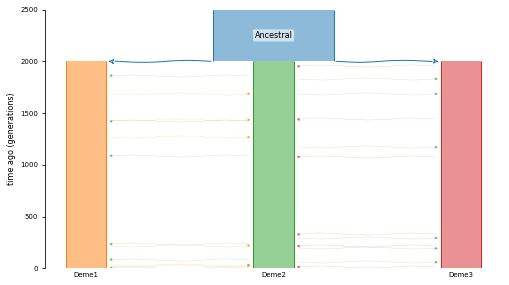

In [189]:
migration_rate1=1e-4
migration_rate2=1e-2

m = demes.Builder(time_units="generations")

#  Add first Ancestor
m.add_deme("Ancestral",epochs=[dict(start_size=N, end_time=time_period)])

m.add_deme("Deme1",ancestors=["Ancestral"],epochs=[dict(start_size=N/3)])
m.add_deme("Deme2",ancestors=["Ancestral"],epochs=[dict(start_size=N/3)])
m.add_deme("Deme3",ancestors=["Ancestral"],epochs=[dict(start_size=N/3)])
m.add_migration(demes = ["Deme1","Deme2"], rate = migration_rate1, end_time=time_period/2)
m.add_migration(demes = ["Deme3","Deme2"], rate = migration_rate1, end_time=time_period/2)

m.add_migration(demes = ["Deme1","Deme2"], rate = migration_rate1, start_time=time_period/6, end_time=1)
m.add_migration(demes = ["Deme3","Deme2"], rate = migration_rate2, start_time=time_period/6 ,end_time=1)

IM = m.resolve()
demesdraw.tubes(IM, log_time=False, num_lines_per_migration=3)

In [198]:
IM.discrete_demographic_events

<bound method Graph.discrete_demographic_events of Graph(description='', time_units='generations', generation_time=1, doi=[], metadata={}, demes=[Deme(name='Ancestral', description='', start_time=inf, ancestors=[], proportions=[], epochs=[Epoch(start_time=inf, end_time=2000.0, start_size=20000.0, end_size=20000.0, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='Deme1', description='', start_time=2000.0, ancestors=['Ancestral'], proportions=[1.0], epochs=[Epoch(start_time=2000.0, end_time=0, start_size=6666.666666666667, end_size=6666.666666666667, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='Deme2', description='', start_time=2000.0, ancestors=['Ancestral'], proportions=[1.0], epochs=[Epoch(start_time=2000.0, end_time=0, start_size=6666.666666666667, end_size=6666.666666666667, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='Deme3', description='', start_time=2000.0, ancestors=['Ancestral'], proportions=[1.0], e

In [ ]:
IM = model.cake_model(Ns=[N,N/3],splits=[3],proportions=[[1/3,1/3,1/3]],time_period_merge=[N,0],time_period_splits=[N],migration_rate=0.02,generation_time=1)

In [197]:
# Sample times at epochs
T,times_dic = slice.sample_timepoints(IM)
# Compute LD 
im_sliced = slice.slice_timepoints(IM,time_points=[0])
im_sliced_LD = get_LD.get_LD_from_sliced_demes(im_sliced)

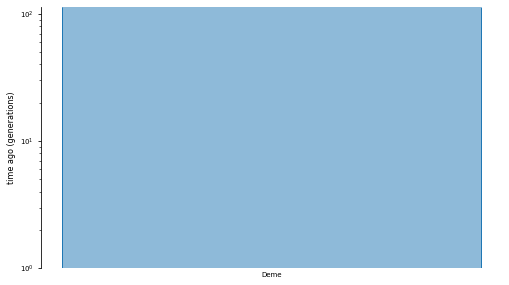

In [202]:
# Get IIRC
im_R,im_iicr, _ = model.get_iicr(IM,pop="Deme1",T=T)
im_sc = model.size_change_from_iicr(im_iicr,times_dic['Deme1'],time_units="generations",plot=True)